In [22]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [23]:
import pandas as pd
import numpy as np
import math as m
import matplotlib
import matplotlib.pyplot as plt
import DataAnalyser2

file_name = "2018-1-22_1.tsch_arduino"

# DataAnalyser2.process_gologic_csv(file_name)
df = pd.read_csv("Data/" + file_name + ".csv", names=["data"])
# df.drop(['accumulated_us'], axis=1, inplace=True)
# df = df.iloc[:108000]
df.columns[0]
df.size

109694

In [24]:
df.head()

,data
0,-2.70
1,-2.62
2,-2.58
3,-2.54
4,-2.55


Number of removed elements: data    0
dtype: int64


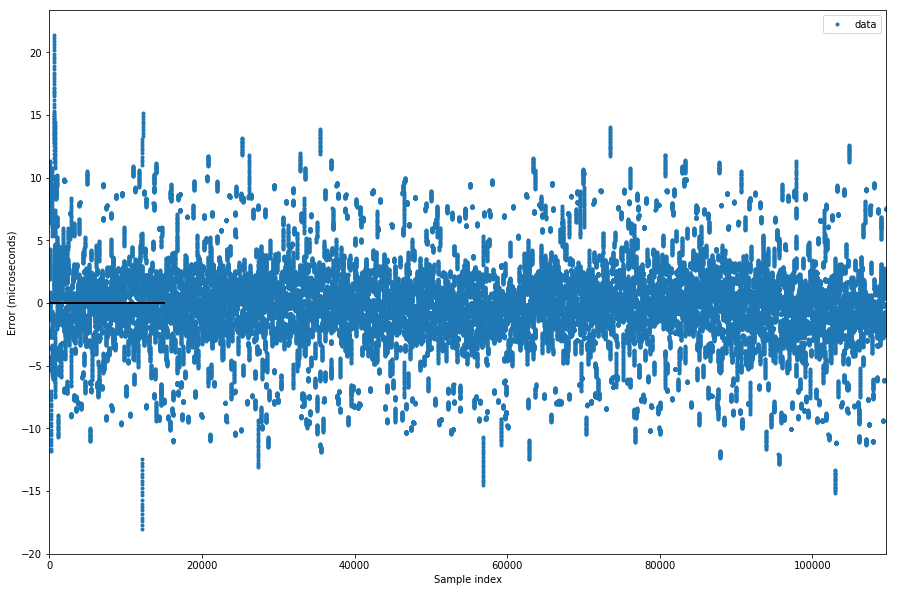

In [25]:
%matplotlib inline
plt.figure()

# remove some outliers
removed_elements_count = df.count()
df_no_outliers = df
coef = 10

mean = df.mean()
std = df.std()

df_no_outliers = df[df < mean + coef*std]
df_no_outliers = df_no_outliers[df > mean - coef*std]

removed_elements_count = removed_elements_count - df_no_outliers.count()
# df.iloc[3500:3700].plot(figsize=(15,10))
raw_sample_plot = df_no_outliers.iloc[:].plot(figsize=(15,10), marker='.', linestyle='')
raw_sample_plot.set_xlabel("Sample index")
raw_sample_plot.set_ylabel("Error (microseconds)")

plt.plot([0, 15000], [0, 0], color='k', linestyle='-', linewidth=2)

print("Number of removed elements: {}".format(removed_elements_count))
raw_sample_plot

In [26]:
df.std()

data    3.056419
dtype: float64

In [27]:
df.mean()

data   -0.213111
dtype: float64

Text(0.5,1,'2018-1-22_1.tsch_arduino')

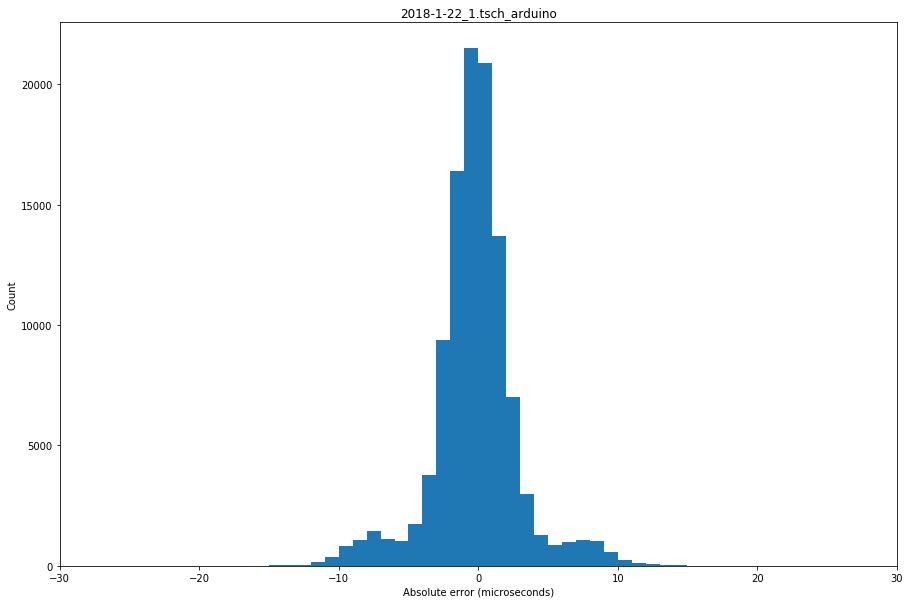

In [28]:
# df.delay_us = df.delay_us[df.delay_us < df.delay_us.mean() + 10*df.delay_us.std()]
# plt.figure()
# plot = zoom_in.hist(cumulative=True, bins=250, figsize=(20,5))
# plot.set_xlim(0,500)

bin_limit = 30
step = 1
bins = list(np.arange(-bin_limit,bin_limit,step))

if df.data.min() < -bin_limit:
    bins = [df.data.min()] + bins
    
if df.data.max() > bin_limit:
    bins = bins + [df.data.max()]


plt.figure()
plot = df.data.plot(kind="hist", cumulative=False, bins=bins, figsize=(15,10), density=False)
# plot.set_xlim(-bin_limit, bin_limit)
plot.set_xlim(-bin_limit, bin_limit)
plot.set_xlabel("Absolute error (microseconds)")
plot.set_ylabel("Count")
plot.set_title(file_name)

Text(0.5,1,'2018-1-22_1.tsch_arduino')

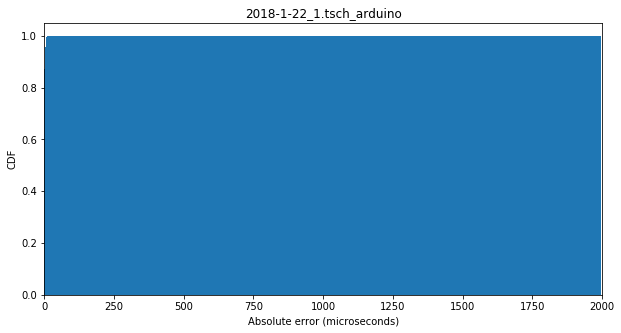

In [29]:
abs_delay = abs(df.data)

bin_limit = 2000
step = 4
bins = list(np.arange(0,bin_limit,step))
    
if abs_delay.max() > bin_limit:
    bins = bins + [abs_delay.max()]


plt.figure()
plot = abs_delay.plot(kind="hist", cumulative=True, normed=1, bins=bins, figsize=(10,5))
plot.set_xlim(0,bin_limit)
plot.set_xlabel("Absolute error (microseconds)")
plot.set_ylabel("CDF")
plot.set_title(file_name)




In [30]:
df.count()

data    109694
dtype: int64

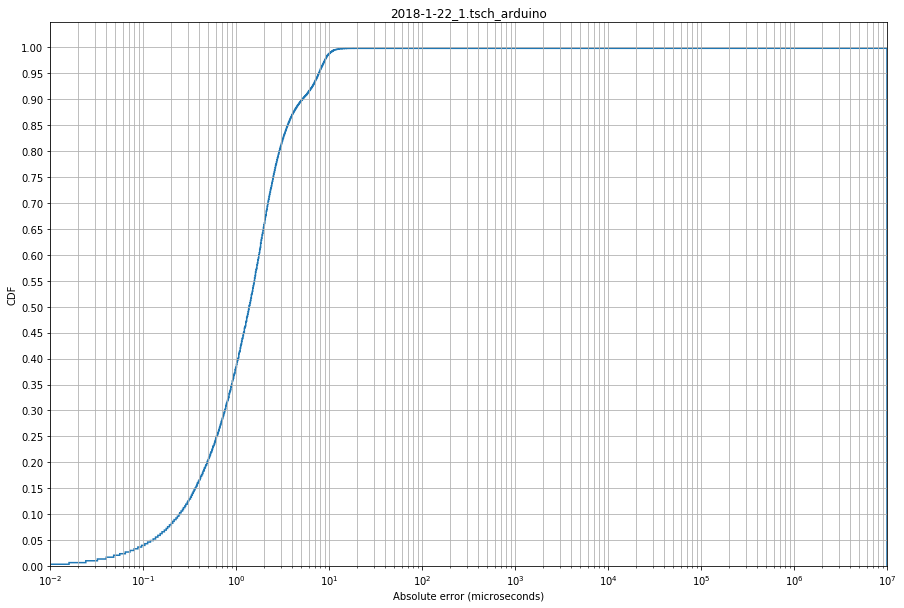

In [31]:
abs_delay = abs(df)

step = 10
# bins = list(np.arange(0,bin_limit,step))
bins = [10**x for x in np.arange(-3,7,0.005)]
    
# if abs_delay.max().max() > bins[-1]:
#     bins = bins + [abs_delay.max().max()/2, abs_delay.max().max()]
    
# bins = [0,10,20,100,1000000]
    
weights = abs_delay.div(abs_delay.sum(axis=0), axis=1)


plt.figure(figsize=(15,10))
plt.xscale("log")

for column in abs_delay.columns:
    data = abs_delay[column].dropna()
    _ = plt.hist(data, bins=bins, weights=np.ones_like(data)/data.count(), cumulative=True, histtype='step', fill=False, linewidth=1.5, alpha=1)

plt.xlim(0.01,10**7)
plt.xlabel("Absolute error (microseconds)")
plt.ylabel("CDF")
plt.title(file_name)
plt.legend(loc='lower right')

plt.grid(which="both")

major_ticks = np.arange(0, 1.01, 0.2)                                              
minor_ticks = np.arange(0, 1.01, 0.05) 

_ = plt.yticks(minor_ticks)
# plt.yticks(minor_ticks, minor=True)